## 测试
利用并查集对相似话题进行合并

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [119]:
def draw_union_find(uf, n):
    G = nx.DiGraph()  # 使用有向图表示树结构
    for i in range(n):
        G.add_node(i)
    for i in range(n):
        parent = uf.find(i)
        if parent != i:
            uf.parent_list[i] = parent  # 更新parent_list
            G.add_edge(i, parent)  # 添加从子节点到父节点的边
    
    # 使用树布局绘制
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10, font_weight='bold', arrows=True)
    plt.title("Union-Find Visualization")
    plt.show()


In [120]:
class UnionFindSet:
    def __init__(self, n):
        self.parent_list = [i for i in range(n)]	# 保存节点的父节点
        self.ranks = [1 for i in range(n)]	# 保存父节点的大小
        
    def find(self, node):
        """非递归版本find(x) + 路径压缩"""
        # 找到node的根节点
        while node != self.parent_list[node]: # 如果假设不成立（r不是根节点），就继续循环
            # 优化：路径压缩
            self.parent_list[node] = self.parent_list[self.parent_list[node]]
            node = self.parent_list[node] # 假设根节点是当前节点的父节点，即往树的上面走一层
        return node

    def union(self, nodea, nodeb):
        """根据Rank来合并(Union by Rank)"""
        rootX,rootY = self.find(nodea), self.find(nodeb)
        print((nodea, nodeb), "->", (rootX,rootY))
        if rootX==rootY:
            return
        #取rank值小的那个挂到大的那个节点下面
        #被挂的那个根节点的rank值需要+
        if(self.ranks[rootX]>self.ranks[rootY]): 
            self.parent_list[rootY] = rootX 
            self.ranks[rootX] += self.ranks[rootY]
        else: 
            self.parent_list[rootX] = rootY
            # self.ranks[rootY] += self.ranks[rootX]

In [91]:
# 7*7 matrix
# sim_matrix = cosine_similarity(vectors)
sim_matrix = [
    [1, 0.9, 0, 0.9, 0, 0, 0],
    [0.9, 1, 0.9, 0, 0, 0.9, 0],
    [0, 0, 1, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 1],
]

In [121]:
df_merge = []
thredshold = 0.85   # 阈值0.75
for i in range(len(sim_matrix)):
    for j in range(i+1, len(sim_matrix)):
        if sim_matrix[i][j] > thredshold:
            df_merge.append([i, j, sim_matrix[i][j]])

# 通过并查集合并同类项
uf = UnionFindSet(len(sim_matrix))
for k in range(len(df_merge)):
    # print(df_merge[k][0], df_merge[k][1])
    uf.union(df_merge[k][0], df_merge[k][1])

print(uf.parent_list)

(0, 1) -> (0, 1)
(0, 3) -> (1, 3)
(1, 2) -> (3, 2)
(1, 5) -> (2, 5)
[1, 2, 5, 2, 4, 5, 6]


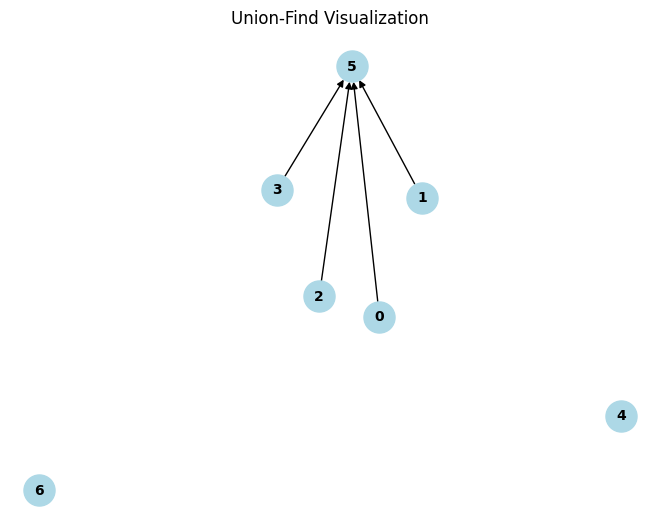

[5, 5, 5, 5, 4, 5, 6]


In [122]:
draw_union_find(uf, n=7)    # 进一步调整&压缩 并查集
print(uf.parent_list)

In [123]:
# 输出 uf 中所有相同父节点的为一组
# 创建一个字典，键为父节点（也即），值为需要合并的索引列表
index_groups = {}
for index, p_value in enumerate(uf.parent_list):  # index 位置对应父节点的值为 value
    if p_value not in index_groups:
        index_groups[p_value] = []
    index_groups[p_value].append(index)
print("合并后的聚簇结果如下：", index_groups.values())
print("其中，包含需合并的数量：", len([x for x in index_groups.values() if len(x)>1]))

合并后的聚簇结果如下： dict_values([[0, 1, 2, 3, 5], [4], [6]])
其中，包含需合并的数量： 1
